<a href="https://colab.research.google.com/github/Almabette/HotelBookingAnalysis/blob/main/Copy_of_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

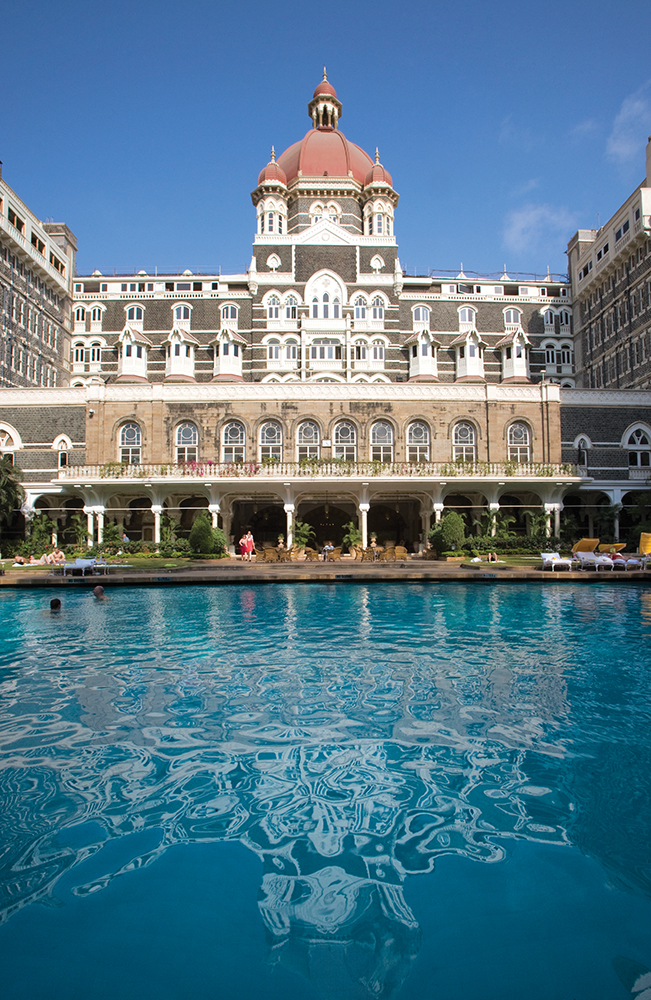

In [2]:
#importing the necessary libraries for analysing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

In [3]:
#connecting my drive to google colaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#accessing/reading the hotel booking dataset
df=pd.read_csv('/content/drive/MyDrive/Almabetter/HotelBookings.csv')

In [5]:
#printing the dataframe
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
#studying the dataframe's observations, variables and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

After loading the dataset we can see a number of things. These 32 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We can also see some missing values, which will require cleaning and handling of NaN values. 

### **Understanding, Wrangling and Cleaning Data**

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis.Side by side, explaining the process and results

**After** looking at the dataset we were able to notice some NaN values, therefore we need to examine missing values further before continuing with analysis


In [7]:
#finding out first which columns have null values
#using 'sum' function will show us how many nulls are found in each column of the dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In this dataset, there are not too many columns with null(NaN) values, as we can see that children column has only 4 null values which we can replace with 0 because it's quite natural that those people didn't bring any child with them. And we can also see that country, agent and company have null values but these columns can not be dropped as we need these columns for our analysis. Instead, the null countries can be replaced with a string 'unknown'.      

In [8]:
#replacing the null values in children column with 0
df.fillna({'children':0},inplace=True)

In [9]:
#replacing null countries with 'unknown'
df.fillna({'country':'unknown'},inplace=True)

In [10]:
#checking again for null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Now only agent and company columns are left which have null values, which will be dealt with later. 

**There** is a column on 1st index whose name is is_canceled which has only 2 values 0 meaning the booking is not cancelled and 1 meaning the booking is cancelled.  

In [11]:
#checking how many bookings are cancelled and how many are not cancelled
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

As we can see that 44224 bookings are cancelled, so we will not be using these 44224 rows for our analysis. Only not cancelled rows will be used for analysis.  

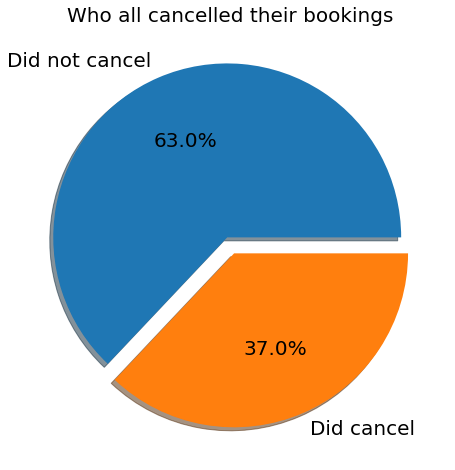

In [12]:
#showing cancelled and not cancelled bookings through a piechart
df['is_canceled'].value_counts().rename({0:'Did not cancel',1:'Did cancel'}).plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Who all cancelled their bookings',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

As our data cleaning comes to an end we will only be working on those rows where bookings are not cancelled and country is not unknown.

In [13]:
#obtaining a new dataframe which has cleaned data
df=df[(df['is_canceled']==0) & (df['country'] != 'unknown')]  

In [14]:
#checking the dataframe before starting analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74745 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74745 non-null  object 
 1   is_canceled                     74745 non-null  int64  
 2   lead_time                       74745 non-null  int64  
 3   arrival_date_year               74745 non-null  int64  
 4   arrival_date_month              74745 non-null  object 
 5   arrival_date_week_number        74745 non-null  int64  
 6   arrival_date_day_of_month       74745 non-null  int64  
 7   stays_in_weekend_nights         74745 non-null  int64  
 8   stays_in_week_nights            74745 non-null  int64  
 9   adults                          74745 non-null  int64  
 10  children                        74745 non-null  float64
 11  babies                          74745 non-null  int64  
 12  meal                           

In [15]:
#also checking the 'is_canceled' column
df['is_canceled'].value_counts()

0    74745
Name: is_canceled, dtype: int64

The data is now cleaned and we can start with our analysis

# **What is the best time of year to book a hotel room ?**


### **This question has two aspects-**

i) From customer's point of view- 

From customers point of view the best time to book a hotel room is when it is the cheapest i.e during off seasons, when not too many people book hotel rooms.

ii)From hotel's point of view-

From hotel's point of view the best time to book the hotel is during onn seasons i.e when too many people are booking rooms and the demand for rooms is high, at that time the hotel can charge high prices from customers, beacause the supply is same but the demand is relatively high.  

In [16]:
#import matplotlib inline
%matplotlib inline

In [17]:
#making a new column for month number
def month_number(month):
  if month=='January':
    return 1
  elif month=='February':
    return 2
  elif month=='March':
    return 3
  elif month=='April':
    return 4
  elif month=='May':
    return 5
  elif month=='June':
    return 6
  elif month=='July':
    return 7
  elif month=='August':
    return 8         
  elif month=='September':
    return 9
  elif month=='October':
    return 10
  elif month=='November':
    return 11     
  else:
    return 12  
df['month_number']=df['arrival_date_month'].apply(month_number)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
#getting per month hotel bookings for each year
per_month_booking_for_each_year=df.groupby('arrival_date_year')['month_number'].value_counts().unstack().fillna(0)

In [19]:
#viewing per month booking for each year
per_month_booking_for_each_year

month_number,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0.0,0.0,0.0,0.0,0.0,0.0,1504.0,2279.0,3006.0,3203.0,1834.0,1927.0
2016,1658.0,2521.0,3312.0,3345.0,3551.0,3185.0,3059.0,3230.0,3361.0,3664.0,2798.0,2438.0
2017,2410.0,2796.0,3279.0,3188.0,3551.0,3208.0,3329.0,3109.0,0.0,0.0,0.0,0.0


In [20]:
#storing the 2015 bookings in 2015's dataset
bookings_in2015=per_month_booking_for_each_year.iloc[0]

In [21]:
#viewing 2015's dataset
bookings_in2015

month_number
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7     1504.0
8     2279.0
9     3006.0
10    3203.0
11    1834.0
12    1927.0
Name: 2015, dtype: float64

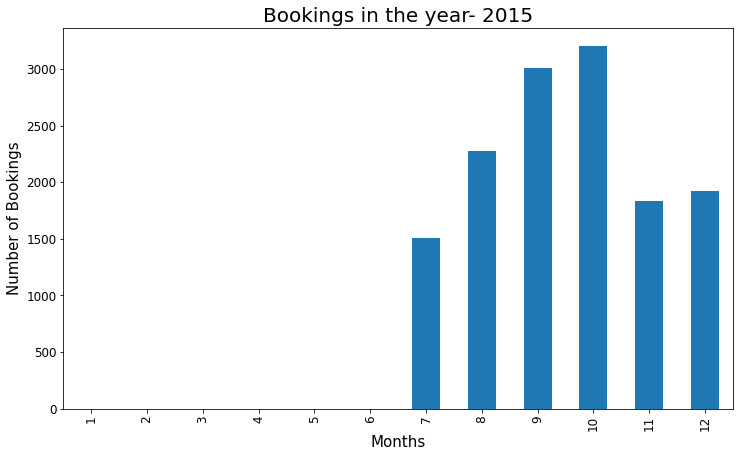

In [23]:
#plotting 2015's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2015.plot(kind='bar',fontsize=12)
plt.title('Bookings in the year- 2015',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2015-**
As we can see in 2015 there are no bookings before July i.e 7th month.
So,

i)From customer's point of view- 

The best time to book hotel room in 2015 is before July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for roms before july is zero or very low, and we all know that demand and price are directly proportional to each other.

ii)From hotel's point of view-

The best time to book hotel room in 2015 is after July because the rates for rooms before July will be very low compared to rates for rooms after July as the demand for rooms before July is zero or very low, and we all know that demand and price are directly proportional to each other. Hence, hotels can charge hight prices from customers during the period when demand for rooms is high i.e after July.


In [22]:
#storing the 2016's bookings in 2016's dataset
bookings_in2016=per_month_booking_for_each_year.iloc[1]

In [23]:
#viewing 2016's dataset
bookings_in2016

month_number
1     1658.0
2     2521.0
3     3312.0
4     3345.0
5     3551.0
6     3185.0
7     3059.0
8     3230.0
9     3361.0
10    3664.0
11    2798.0
12    2438.0
Name: 2016, dtype: float64

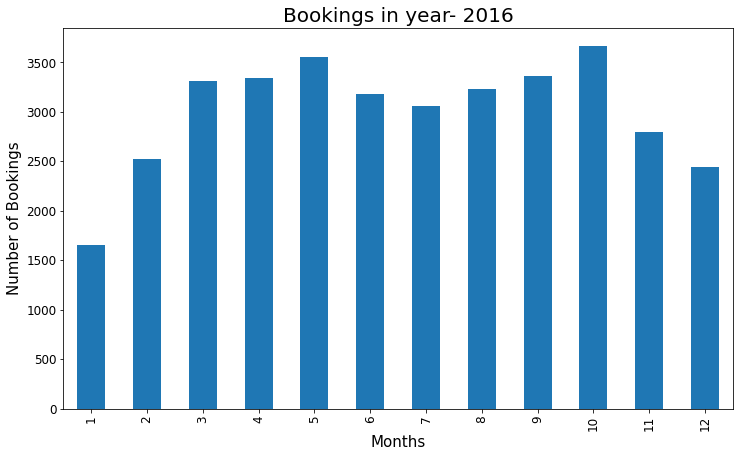

In [24]:
#plotting 2016's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2016.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2016',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2016-**
As we can see in 2016 there are bookings in every month. So,

i)From customer's point of view-

The best time to book hotel room in 2016 is during 1st two and last 2 months of the year because these months have the least number of bookings throughout the year. Hence, the price for rooms during these months will be less compared to other months.  

ii)From hotel's point of view- 

The best time to book hotel room in 2016 is during 3rd-10th month of the year because these months have the ggod amount of bookings. Hence, the hotel can charge reatively high price from customers during these months.  


In [25]:
#storing the 2017's bookings in 2017's dataset
bookings_in2017=per_month_booking_for_each_year.iloc[2]

In [26]:
#viewing 2017's dataset
bookings_in2017

month_number
1     2410.0
2     2796.0
3     3279.0
4     3188.0
5     3551.0
6     3208.0
7     3329.0
8     3109.0
9        0.0
10       0.0
11       0.0
12       0.0
Name: 2017, dtype: float64

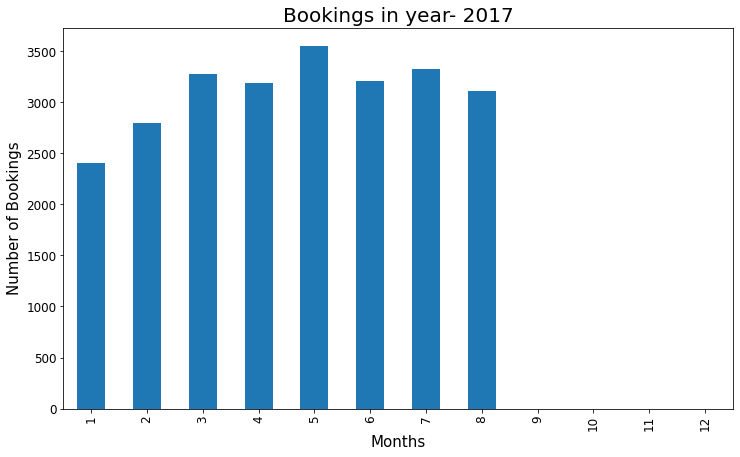

In [27]:
#plotting 2017's dataset on a bar graph
plt.figure(figsize=(12,7))
bookings_in2017.plot(kind='bar',fontsize=12)
plt.title('Bookings in year- 2017',fontsize=20)
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

### **Trends in 2017-**
As we can see in 2017 there are no/less bookings after 8th month i.e August. So,

i)From customer's point of view-

The best time to book hotel room in 2017 is after August because there is not a single booking trafic after August compare to rest of the months of year 2017, which ultimately will give customer high probability to get discounted rates on hotel rooms.

ii)From hotel's point of view-

The best time to book hotel room in 2017 is till Month of August because till August, graph is denoting high amount of customer engagement which will enable the hotel to charge relatively high price from customers during this period.



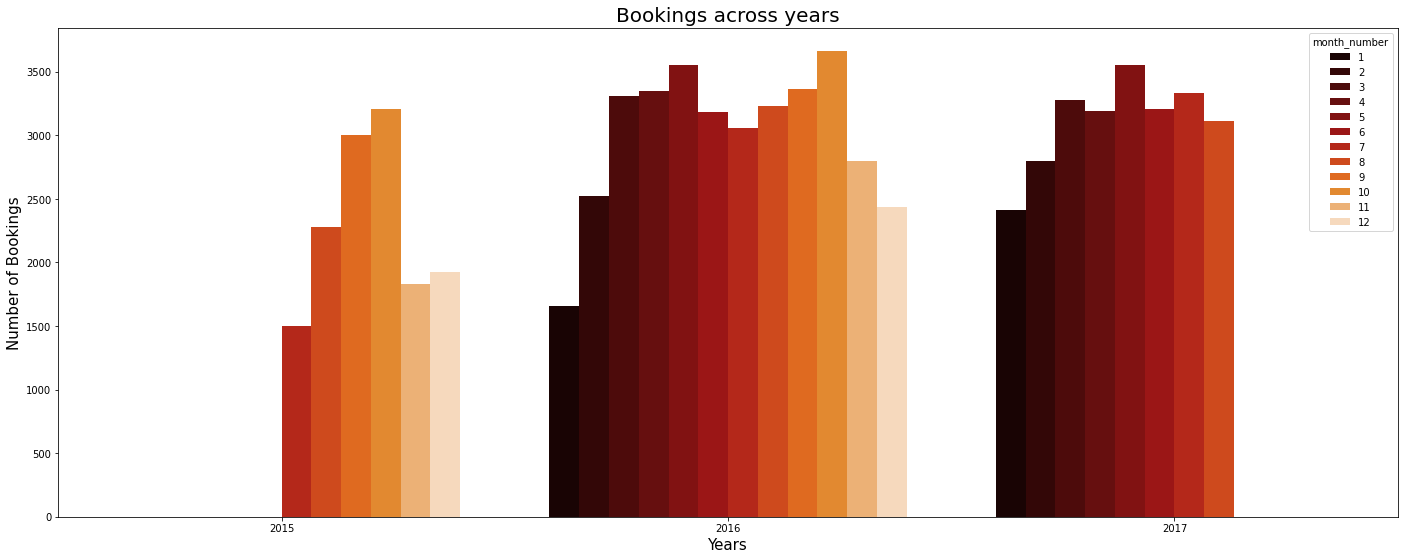

In [28]:
#plotting number of bookings across years
plt.figure(figsize=(24,9))
sns.countplot(x='arrival_date_year',data=df,hue='month_number',palette='gist_heat')
plt.title('Bookings across years',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.show()

Most number of bookings were in the year 2016. And the busiest month for the last 2 years was 5th month i.e May.  

# **What is the optimal length of stay in order to get the best daily rate?**

In order to determine the length of stay for getting the best daily rate i.e lowest adr(average daily rate). We need to compare the total nights stayed and adr with each other.  

In [29]:
#calculating the total nights stayed by each customer
df['nights_stayed']= df['stays_in_weekend_nights'] + df['stays_in_week_nights']  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


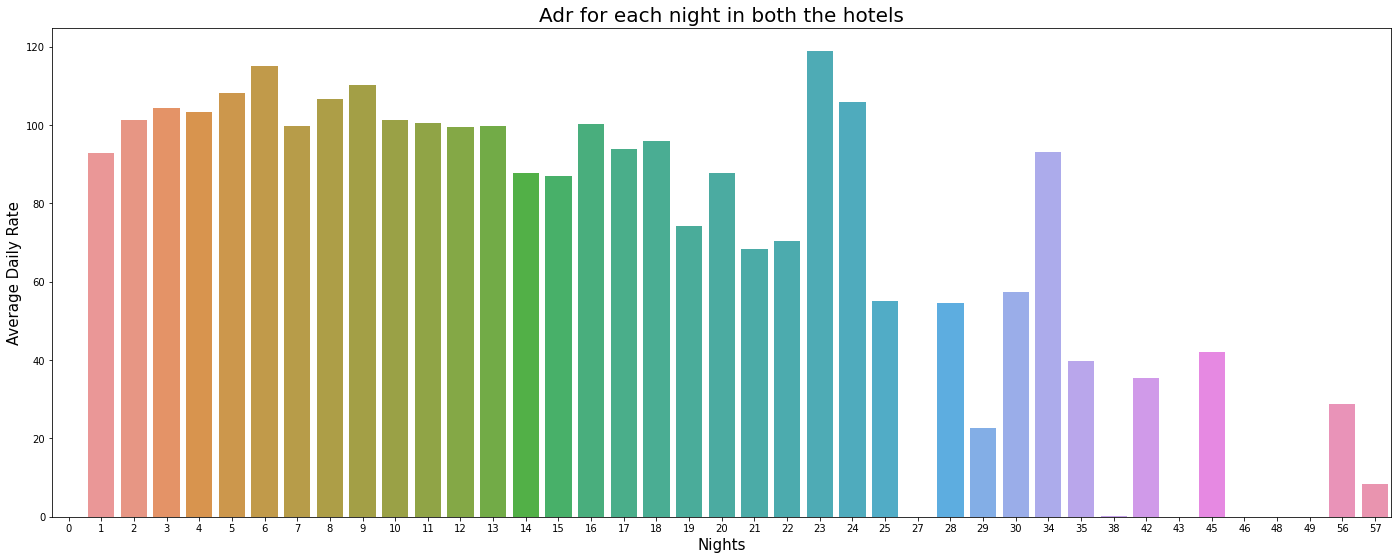

In [30]:
#comparing adr and nights stayed in order to get optimal length of stay
plt.figure(figsize=(24,9))
sns.barplot(x='nights_stayed',y='adr',data=df,ci=0.01)
plt.title('Adr for each night in both the hotels',fontsize=20)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.xlabel('Nights',fontsize=15)
plt.show()

## **Observation:** 

For determining the optimal length of stay in order to get the best daily rate one should stay for 1 night or should have a plan to stay for a couple of nights. Because as per the above graph, if a customer stays for 7 nights he'll get a low daily rate. Also, we can say that the maximum night stays are directly proportional to the best daily rate (i.e. at a low price). You can see if the customer stayed for 15 nights, he/she will get the best daily rate compared to 7 nights. In the same manner, if the customer lasted for the 25th night he/she will get a better daily rate than the aforementioned night's duration.

# **How to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

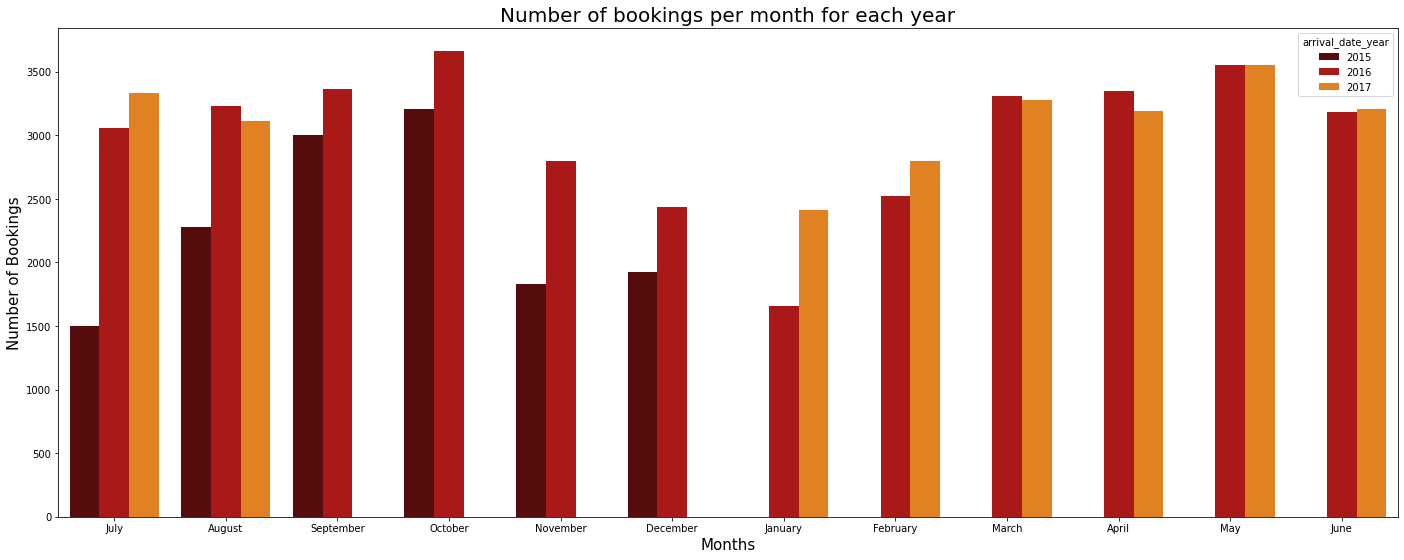

In [31]:
plt.figure(figsize=(24,9))
sns.countplot(x='arrival_date_month',data=df,hue='arrival_date_year',palette='gist_heat')
plt.xlabel('Months',fontsize=15)
plt.ylabel('Number of Bookings',fontsize=15)
plt.title('Number of bookings per month for each year',fontsize=20)
plt.show()

## **Observation:** 
In the Month of July and August Hotels are getting high amount of Special Requests from Customers. Further we can also see that customers are constantly making spacial request in the month of April, May and June in the year of 2017.
Hence, it can be insighted that hotels are likely to receive a proportionately high number of special requests in the month of July and August in the upcoming year.

# **Which hotel to choose city or resort?**

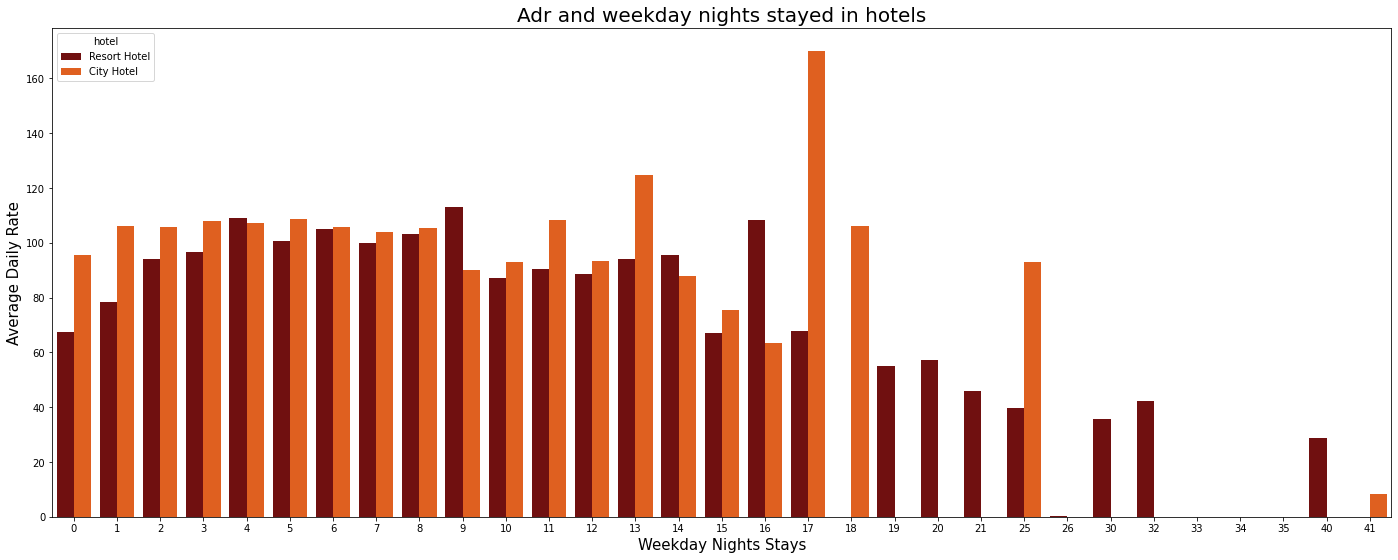

In [32]:
plt.figure(figsize=(24,9))
sns.barplot(x='stays_in_week_nights',y='adr',data=df,hue='hotel',ci=0.01,palette='gist_heat')
plt.xlabel('Weekday Nights Stays',fontsize=15)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.title('Adr and weekday nights stayed in hotels',fontsize=20)
plt.show()

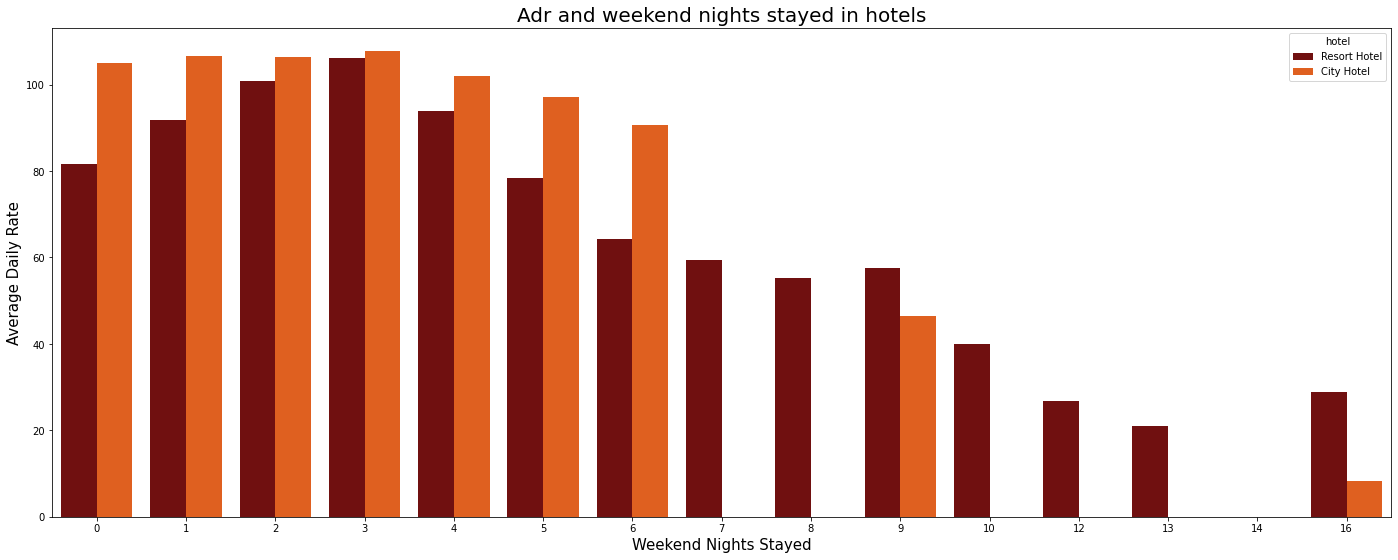

In [33]:
plt.figure(figsize=(24,9))
sns.barplot(x='stays_in_weekend_nights',y='adr',data=df,hue='hotel',ci=0.01,palette='gist_heat')
plt.title('Adr and weekend nights stayed in hotels',fontsize=20)
plt.xlabel('Weekend Nights Stayed',fontsize=15)
plt.ylabel('Average Daily Rate',fontsize=15)
plt.show()

## **Observation -**
 From the above graph we can infer that, If a customer wants affordable stay then they can choose Resort Hotels over City Hotels because in both the graphic representations we can see that Resort Hotel is offering less price than City Hotel.

# **Loyality Check**
Checking if a customer is a repeated guest or not i.e loyal customer or not. 

This can checked using the 'is_repeated_guest' column.  

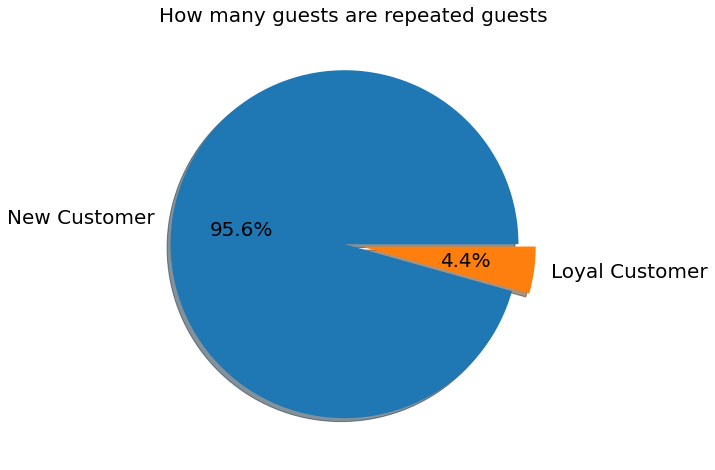

In [34]:
#checking how many guests are loyal
df['is_repeated_guest'].value_counts().rename({0:'New Customer',1:'Loyal Customer'}).plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('How many guests are repeated guests',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# **How many people got their desired room**
This can be showcased 

In [35]:
df['reserved_room_type'].value_counts()

A    52022
D    13072
E     4588
F     2010
G     1320
B      750
C      623
H      356
L        4
Name: reserved_room_type, dtype: int64

In [36]:
def got_desired_room(a,b):
  if a==b:
    return 'Yes'
  else:
      return 'No'
df['got_desired_room']=df.apply(lambda x1:got_desired_room(x1['reserved_room_type'],x1['assigned_room_type']),axis=1)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
df['got_desired_room'].value_counts()

Yes    60839
No     13906
Name: got_desired_room, dtype: int64

In [38]:
def got_desired_room(a,b):
  if a==b:
    return 'Yes'
  else:
      return 'No'
df['got_desired_room']=df.apply(lambda x1:got_desired_room(x1['reserved_room_type'],x1['assigned_room_type']),axis=1)      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


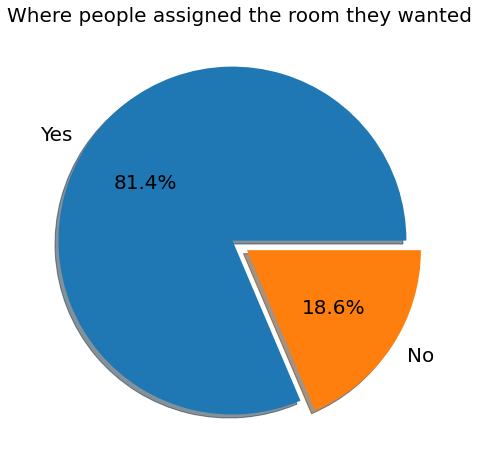

In [39]:
#checking
df['got_desired_room'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title('Where people assigned the room they wanted',fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

# **Determining the price for each customer**

In [40]:
def price(a,b):
  return a*b
df['price']=df.apply(lambda x1:price(x1['adr'],x1['nights_stayed']),axis=1)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
df[['price','adr','nights_stayed']].head(15)

,price,adr,nights_stayed
0,0.00,0.00,0
1,0.00,0.00,0
2,75.00,75.00,1
3,75.00,75.00,1
4,196.00,98.00,2
5,196.00,98.00,2
6,214.00,107.00,2
7,206.00,103.00,2
11,580.00,145.00,4
12,388.00,97.00,4


# **Revenue earned by hotels for each year**

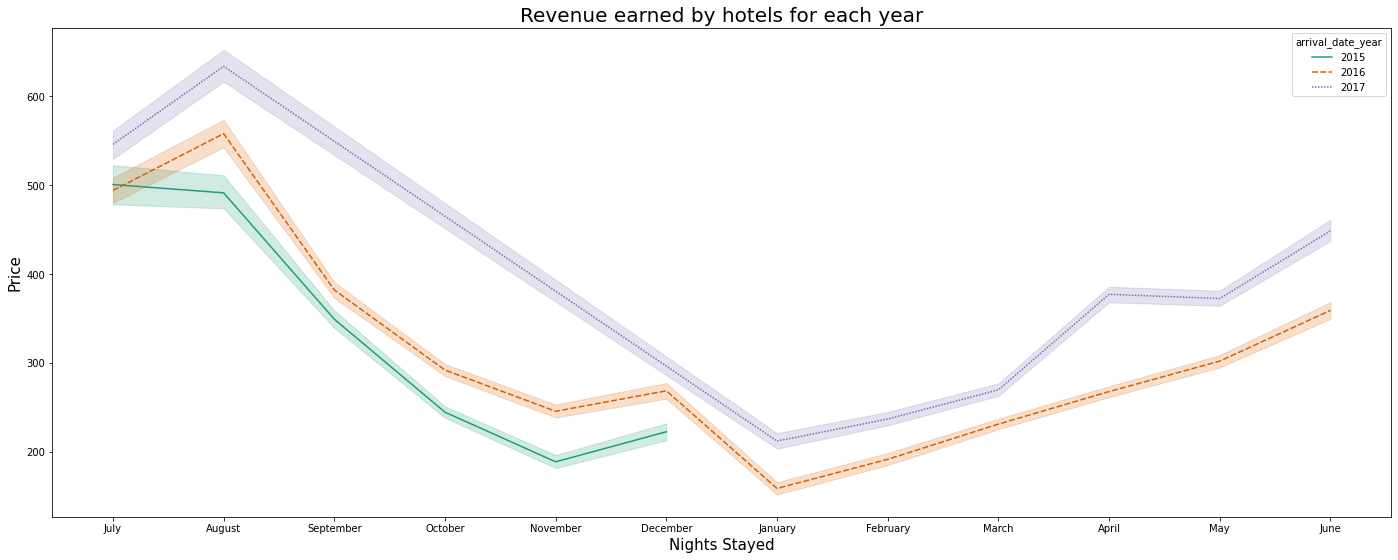

In [42]:
plt.figure(figsize=(24,9))
sns.lineplot(x='arrival_date_month',y='price',data=df,hue='arrival_date_year',style='arrival_date_year',palette='Dark2')
plt.title('Revenue earned by hotels for each year',fontsize=20)
plt.xlabel('Nights Stayed',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

# **Car parking Spaces required in hotels**

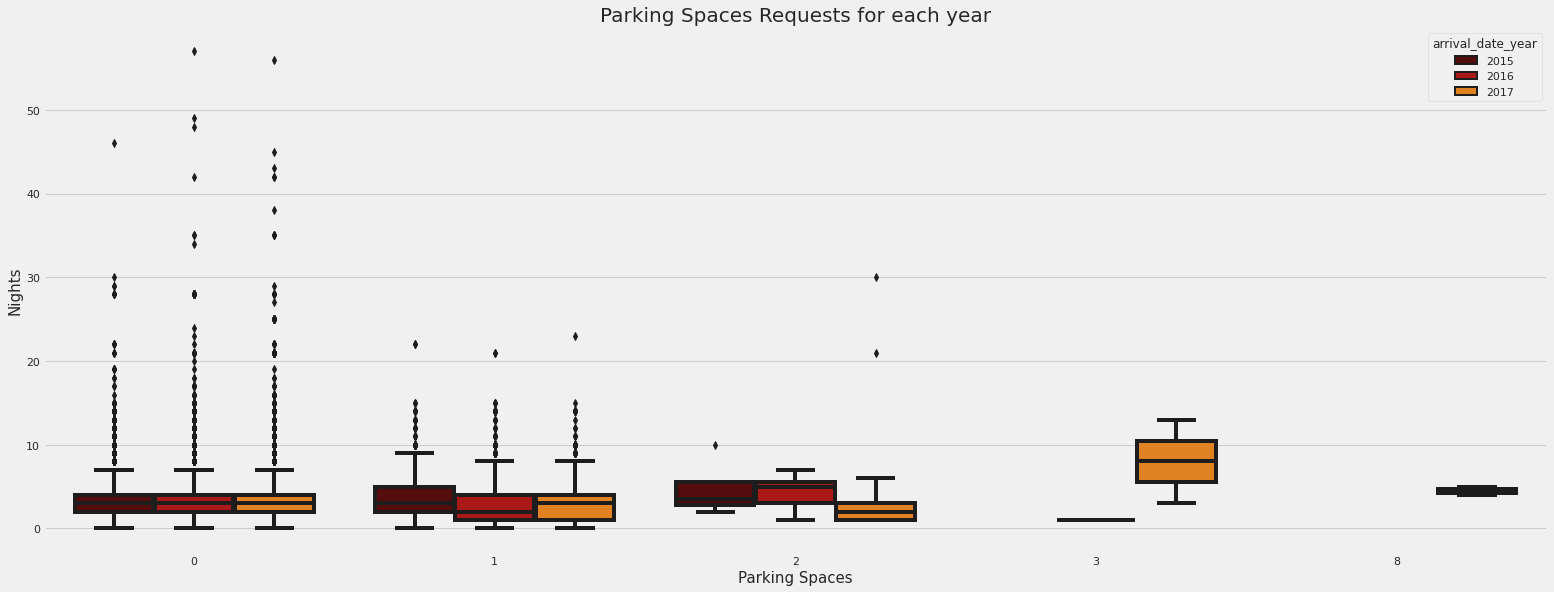

In [75]:
plt.figure(figsize=(24,9))
sns.boxplot(x='required_car_parking_spaces',y='nights_stayed',data=df,hue='arrival_date_year',palette='gist_heat')
plt.title('Parking Spaces Requests for each year', fontsize=20)
plt.xlabel('Parking Spaces',fontsize=15)
plt.ylabel('Nights',fontsize=15)
plt.show()

# **Which meal is mostly preffered by people belonging to different market segments?** 

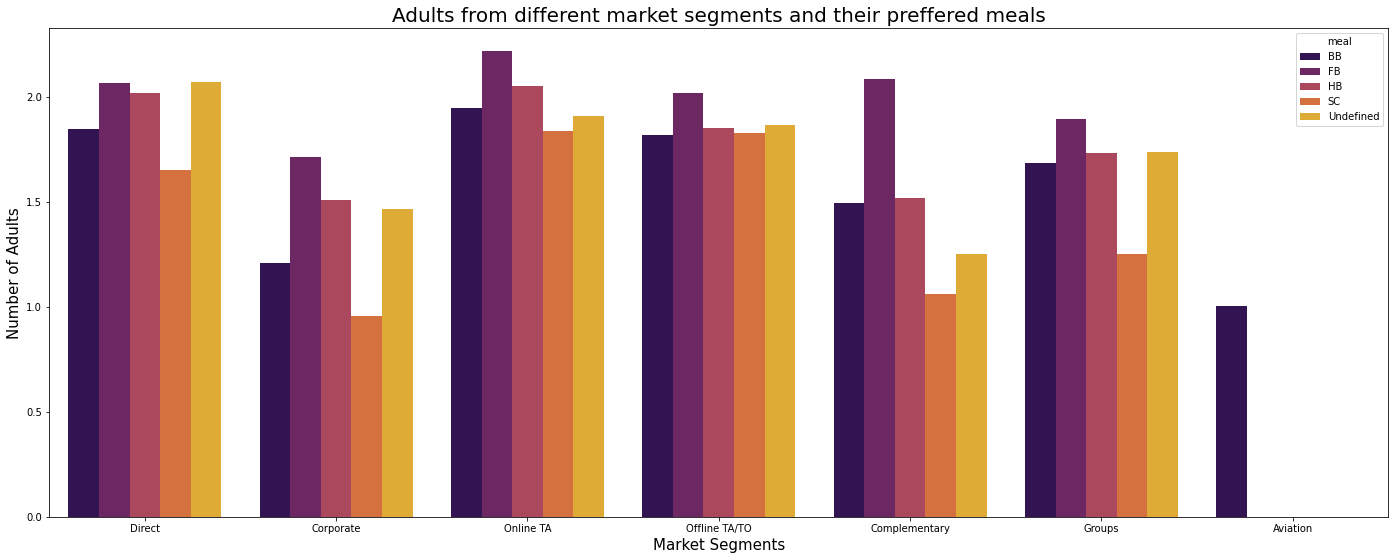

In [43]:
#using adults ,meal and market segment columns for solving this problem
plt.figure(figsize=(24,9))
sns.barplot(x='market_segment',y='adults',data=df,hue='meal',ci=0.01,palette='inferno')
plt.title('Adults from different market segments and their preffered meals', fontsize=20)
plt.xlabel('Market Segments',fontsize=15)
plt.ylabel('Number of Adults',fontsize=15)
plt.show()

## **Observation:** 
from the above graph we see that most of the people preferred FB(i.e. Full Board), which ultimately showcases the trustworthy and tasty meals offered by Hotels to their customers.

# **Lead time for each type of customer and the maket segment they belong to**

This problem will tell us 2 things first classification of each type of customer into different market segments and their lead time

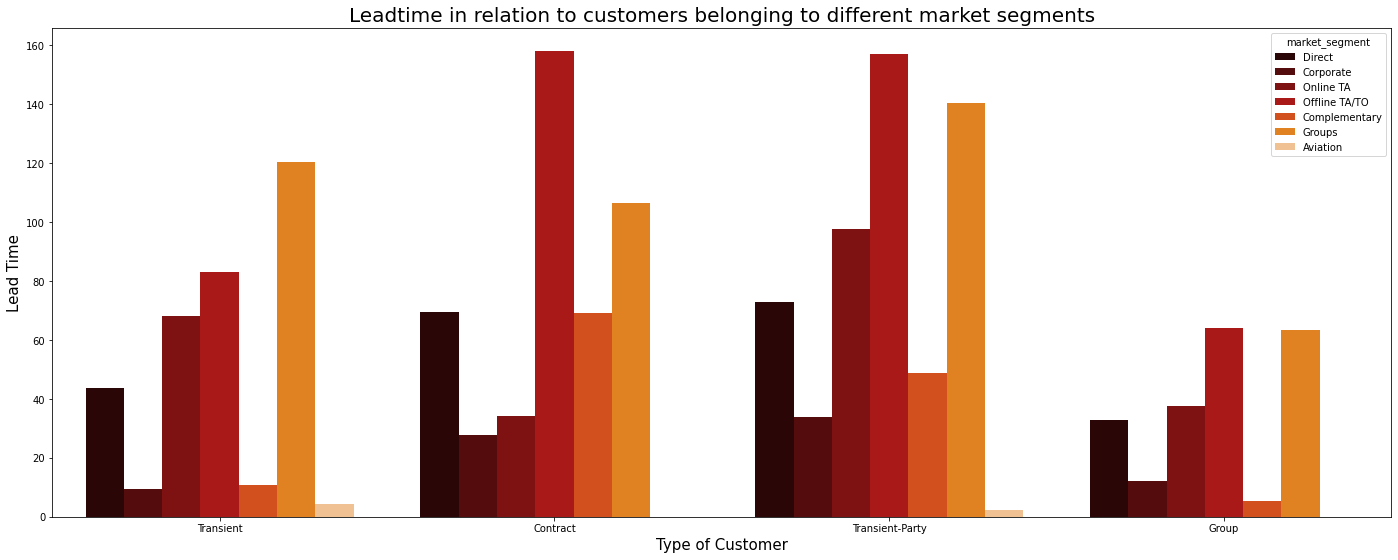

In [44]:
#displaying leadtime in relation to customers belonging to different market segments 
plt.figure(figsize=(24,9))
sns.barplot(x='customer_type',y='lead_time',data=df,hue='market_segment',ci=0.01,palette='gist_heat')
plt.title('Leadtime in relation to customers belonging to different market segments',fontsize=20)
plt.xlabel('Type of Customer',fontsize=15)
plt.ylabel('Lead Time',fontsize=15)
plt.show()

## **Observation**: 
Contracted and Transient-Party Customers generally book the hotels too early with respect to their actual arriving time which increases their lead time (lead time means the number of days between the time a customer books their room and the time they are scheduled to arrive at the hotel). Also, we see that the Customers belonging to the Aviation market mostly book tickets on time hence they've got the lowest lead time.

# **Lead time for each type of customer and the maket segment they belong to**

This problem will tell us 2 things first classification of each type of customer into different market segments and their lead time

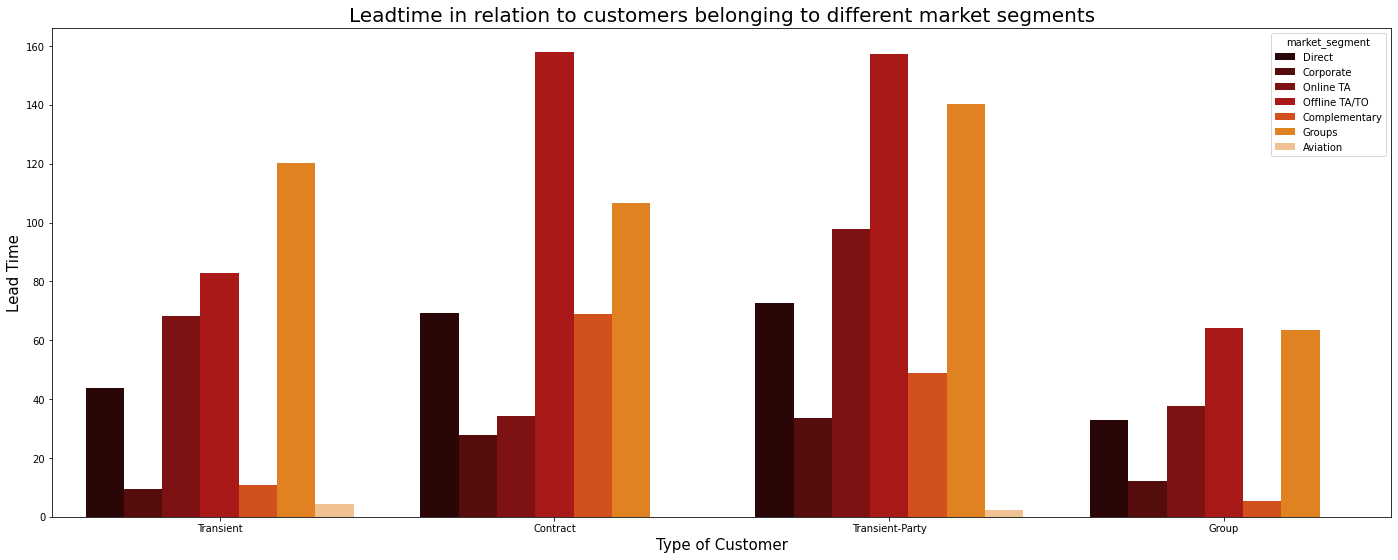

In [45]:
#displaying leadtime in relation to customers belonging to different market segments 
plt.figure(figsize=(24,9))
sns.barplot(x='customer_type',y='lead_time',data=df,hue='market_segment',ci=0.01,palette='gist_heat')
plt.title('Leadtime in relation to customers belonging to different market segments',fontsize=20)
plt.xlabel('Type of Customer',fontsize=15)
plt.ylabel('Lead Time',fontsize=15)
plt.show()

## **Observation**: 
Contracted and Transient-Party Customers generally book the hotels too early with respect to their actual arriving time which increases their lead time (lead time means the number of days between the time a customer books their room and the time they are scheduled to arrive at the hotel). Also, we see that the Customers belonging to the Aviation market mostly book tickets on time hence they've got the lowest lead time.

# **How many companies did their booking through agents?**

In [46]:
co_book_agents=df[(df['market_segment']=='Corporate') & (~df['agent'].isnull())]

In [47]:
co_book_agents['agent']=co_book_agents['agent'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
co_book_agents['agent']

3         304
363       167
1074      110
1517       88
2062      110
         ... 
115512    219
115513    219
115514    219
115524    219
115525    219
Name: agent, Length: 521, dtype: int64

In [51]:
co_book_agents['agent'].isnull().sum()

0

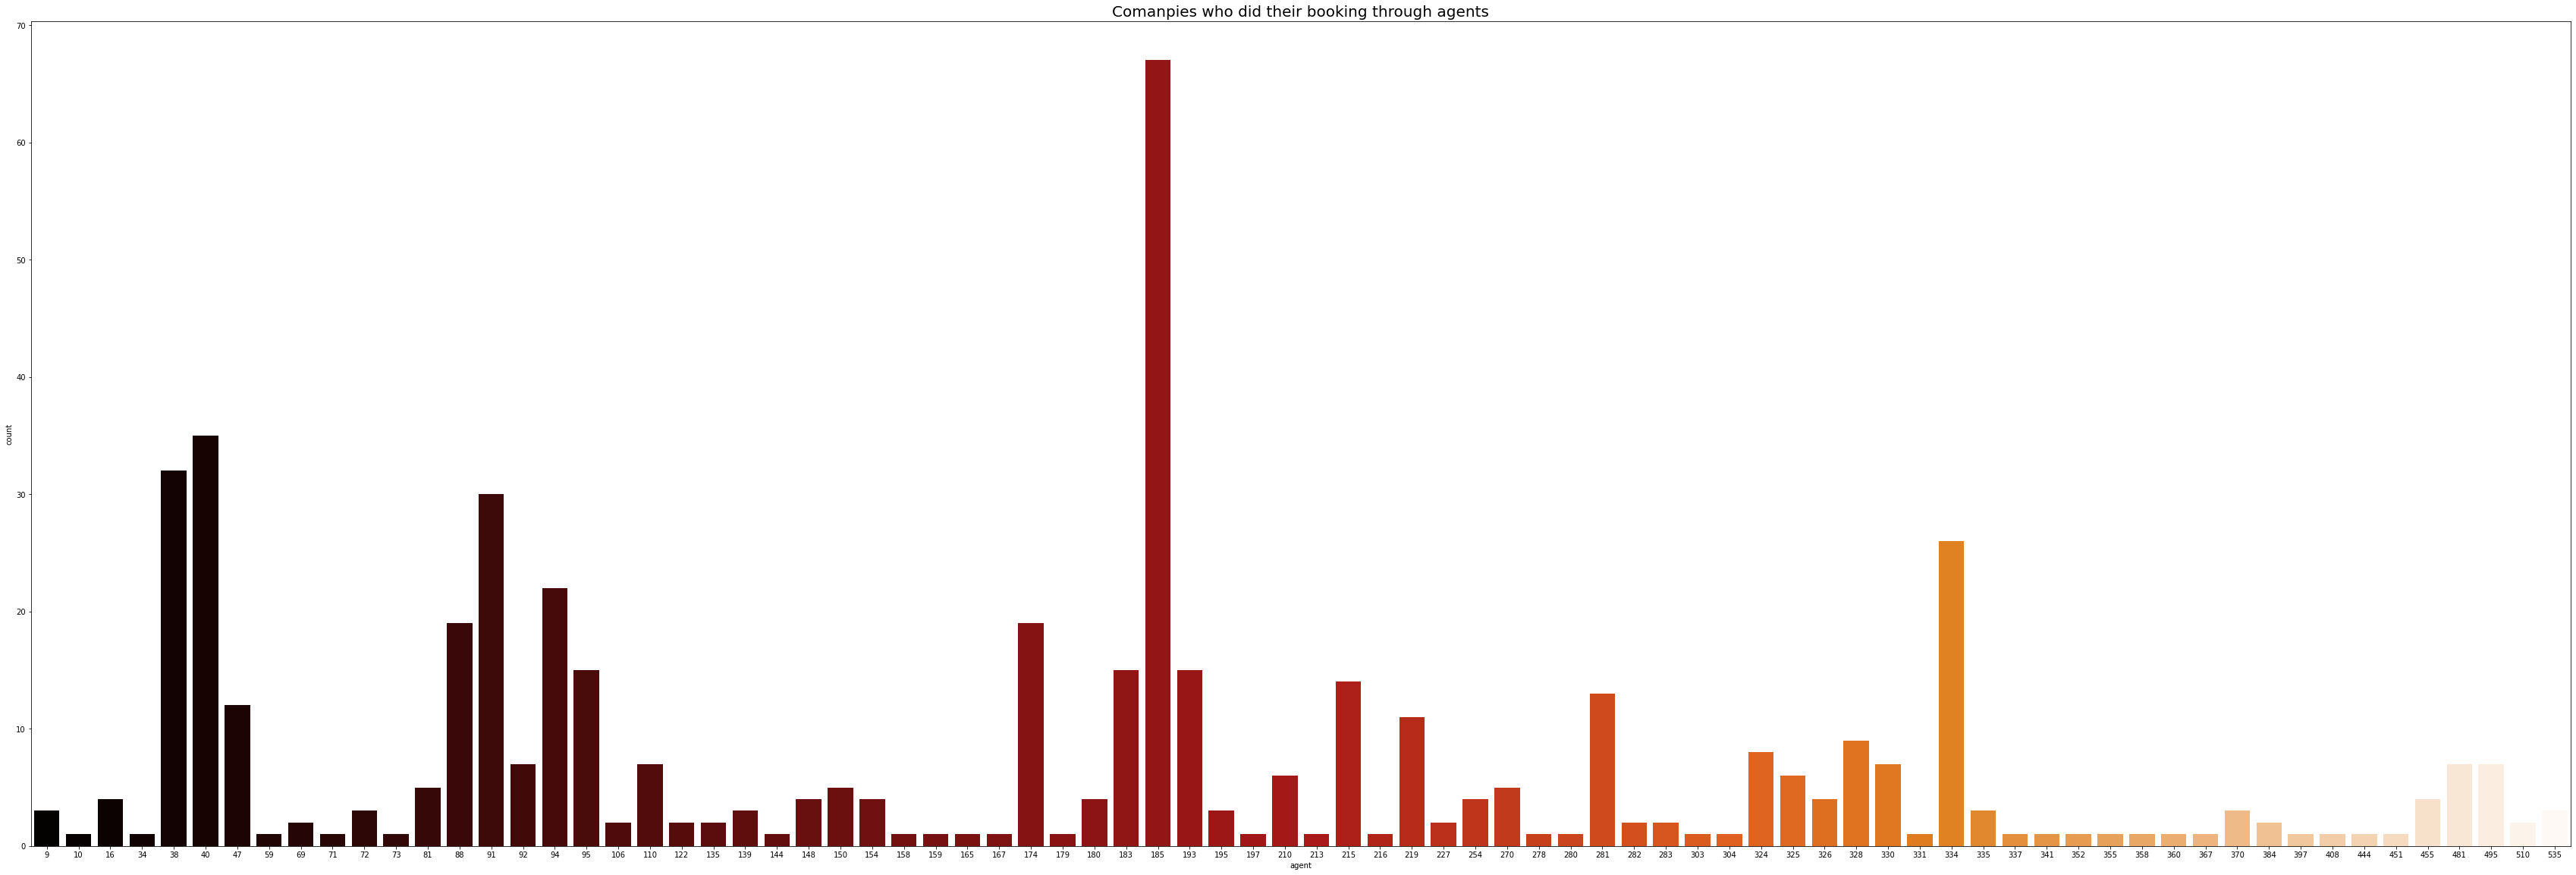

In [49]:
plt.figure(figsize=(60,20))
sns.countplot(x='agent',data=co_book_agents,palette='gist_heat')
plt.title('Comanpies who did their booking through agents',fontsize=20)
plt.show()

## **Observation:** 
It seems the Agent with ID 185 is the most useful agent who is boosting up the business of the Hotels by booking the most numbers of corporate trips in the Hotels.

# **How many agents did their booking through companies?**

In [50]:
ag_book_co=df[(df['distribution_channel']=='TA/TO')&(~df['company'].isnull())]

In [51]:
ag_book_co[['distribution_channel','company']].isnull().sum()

distribution_channel    0
company                 0
dtype: int64

In [52]:
ag_book_co[['distribution_channel','company']]

,distribution_channel,company
541,TA/TO,240.0
1970,TA/TO,240.0
2392,TA/TO,113.0
3961,TA/TO,371.0
10387,TA/TO,223.0
...,...,...
111431,TA/TO,148.0
112499,TA/TO,478.0
113046,TA/TO,148.0
113082,TA/TO,148.0


In [53]:
ag_book_co['company']=ag_book_co['company'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


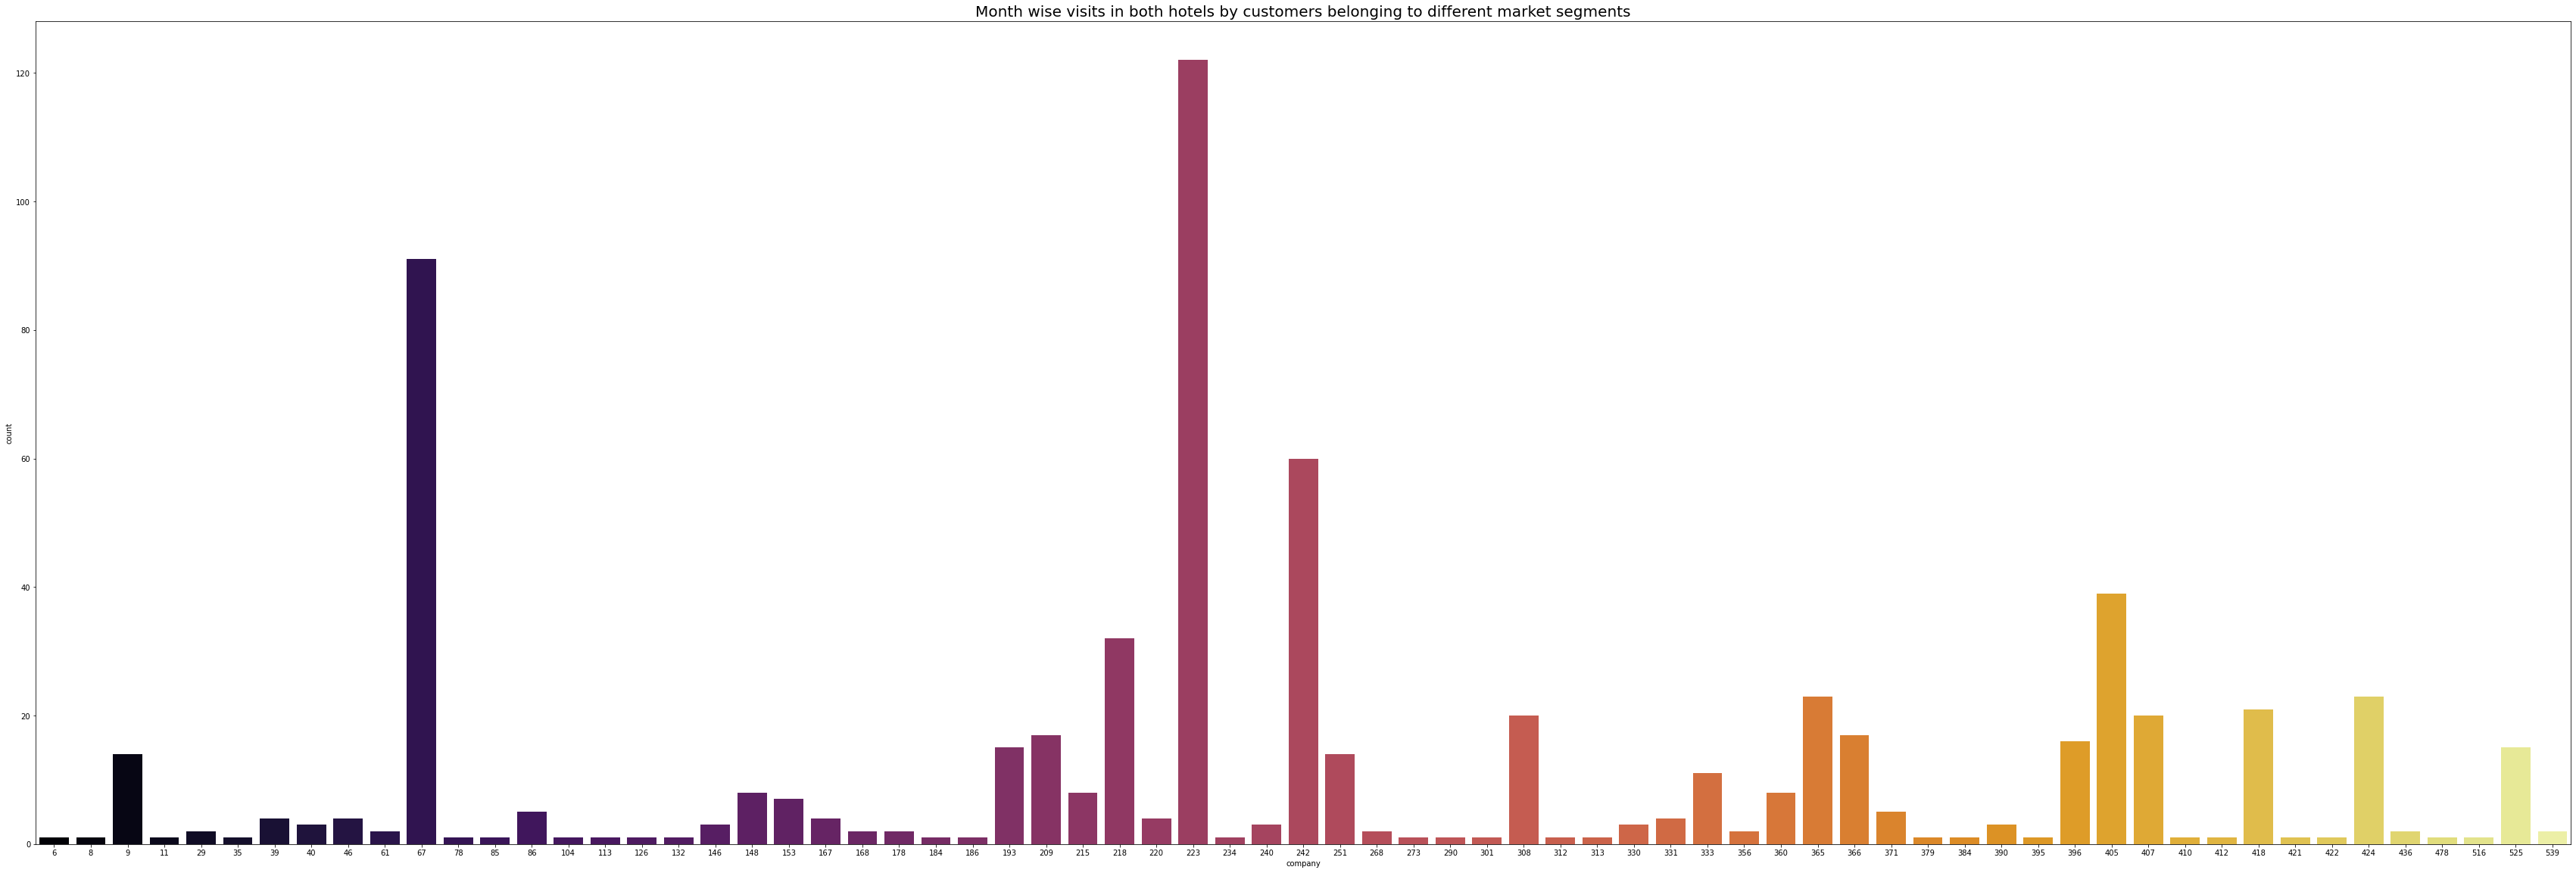

In [54]:
plt.figure(figsize=(60,20))
sns.countplot(x='company',data=ag_book_co,palette='inferno')
plt.title('Month wise visits in both hotels by customers belonging to different market segments',fontsize=20)
plt.show()

## **Observation:** 
The above barplot gives insights that the company having ID 223 has done the highest number of bookings for agents.

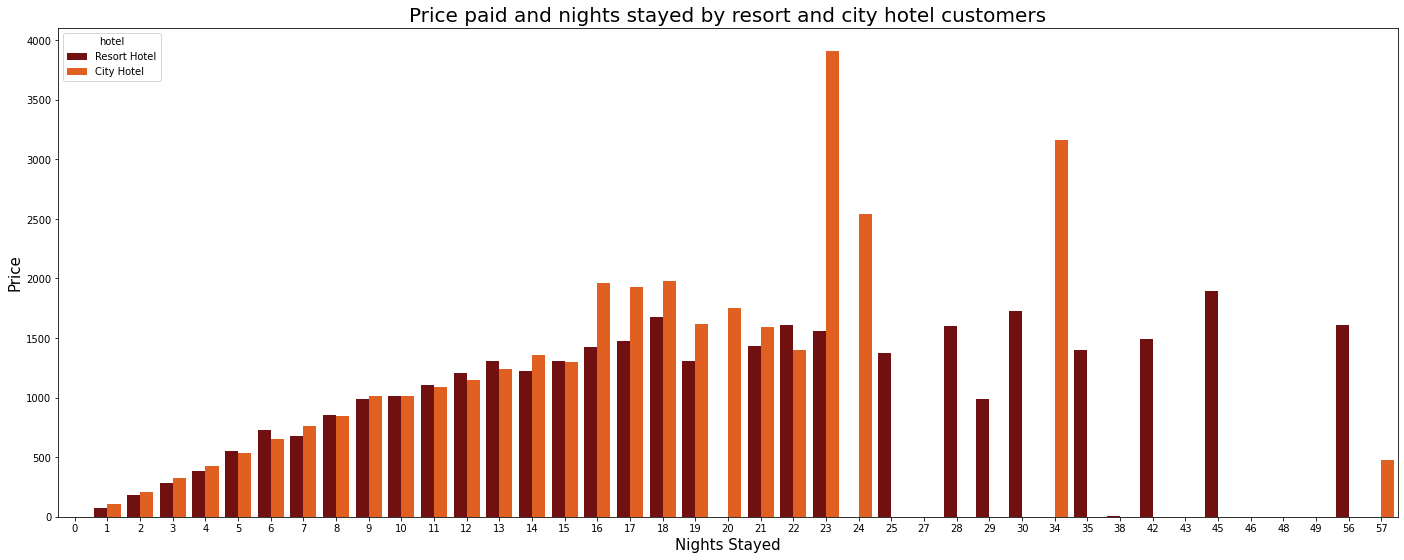

In [55]:
plt.figure(figsize=(24,9))
sns.barplot(x='nights_stayed',y='price',data=df,hue='hotel',ci=0.01,palette='gist_heat')
plt.title('Price paid and nights stayed by resort and city hotel customers',fontsize=20)
plt.xlabel('Nights Stayed',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()palette='gist_heat'

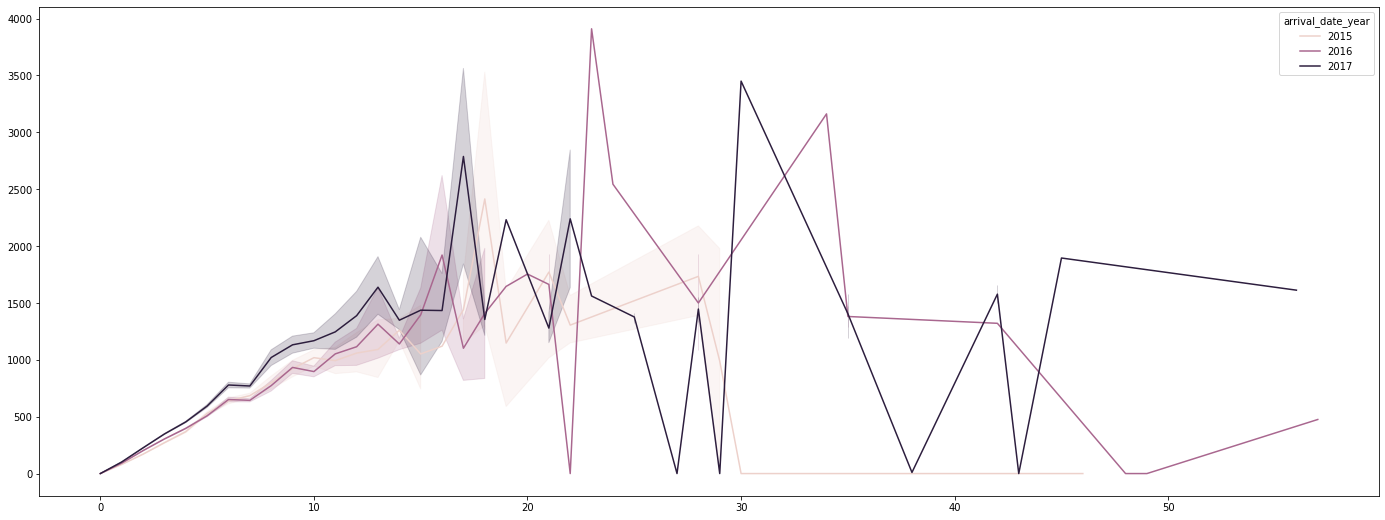

In [56]:
plt.figure(figsize=(24,9))
sns.lineplot(x=df['stays_in_weekend_nights']+df['stays_in_week_nights'],y=(df['stays_in_weekend_nights']+df['stays_in_week_nights'])*df['adr'],data=df,hue='arrival_date_year')

#Problem

##what is the precntage of cancellation in city hotel and resort hotel?

##Below countplot show the average percentage of cancelation in city hotel and resort hotel

Text(0, 0.5, 'Reservation Count')

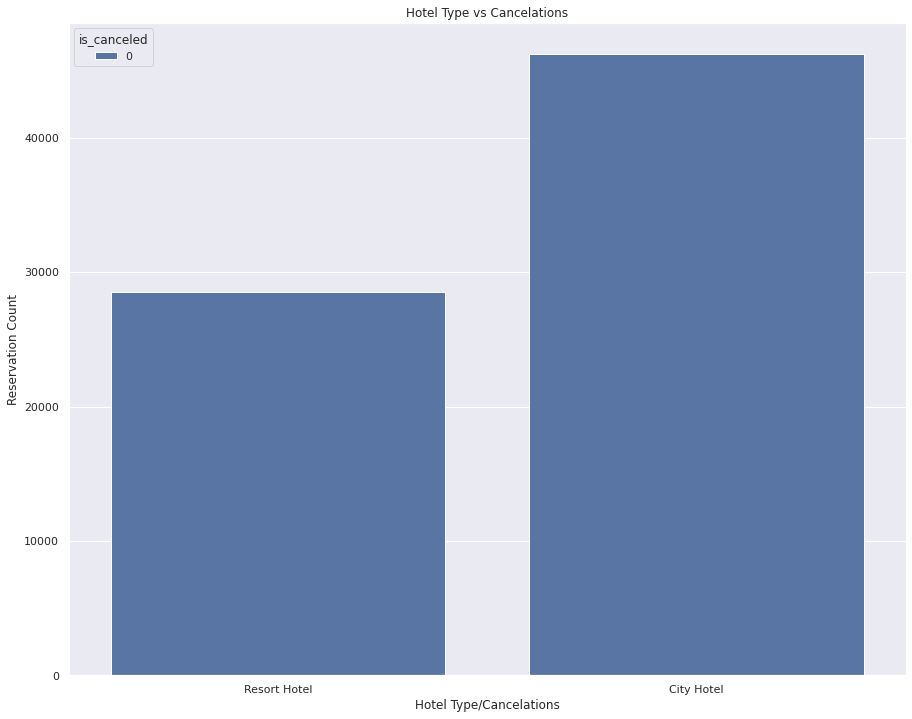

In [57]:
#use countplot
sns.set(rc={'figure.figsize':(15,12)})
Hotel=sns.countplot(x='hotel',hue='is_canceled',data=df)
Hotel.set(title='Hotel Type vs Cancelations')
Hotel.set_xlabel("Hotel Type/Cancelations",fontsize=12)
Hotel.set_ylabel("Reservation Count",fontsize=12)

In [58]:
from locale import normalize
df['is_canceled'].value_counts(normalize=True)

0    1.0
Name: is_canceled, dtype: float64

##Observation
these  countplot show that total 37% people were cenceled in booking city or resort hotel and 63% custmer not canceled in booking city and resort hotel

##What type of meal required in hotel?


###below countplot show the diffrent type of food is provided by hotel

Text(0, 0.5, 'Count')

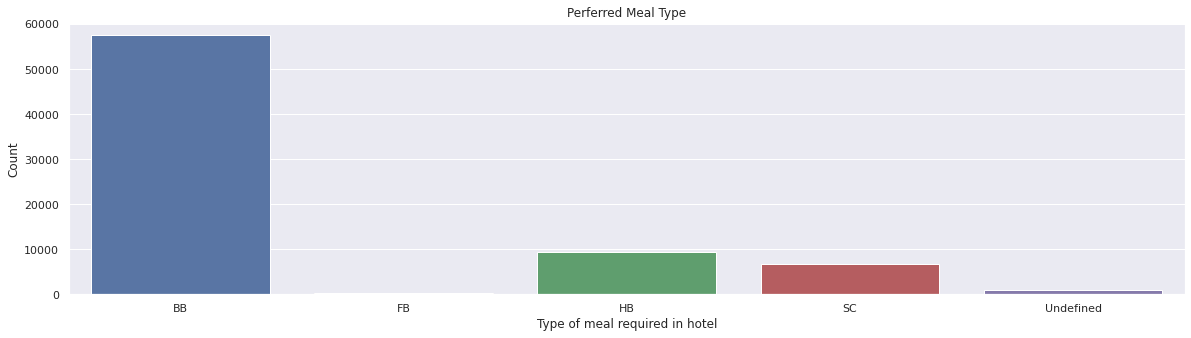

In [59]:
#use countplot
plt.figure(figsize=(20,5))
sns.countplot(x=df['meal'])
plt.title('Perferred Meal Type')
plt.xlabel('Type of meal required in hotel')
plt.ylabel('Count')

In [60]:
df['meal'].value_counts(normalize=True)

BB           0.768092
HB           0.126470
SC           0.089397
Undefined    0.011760
FB           0.004281
Name: meal, dtype: float64

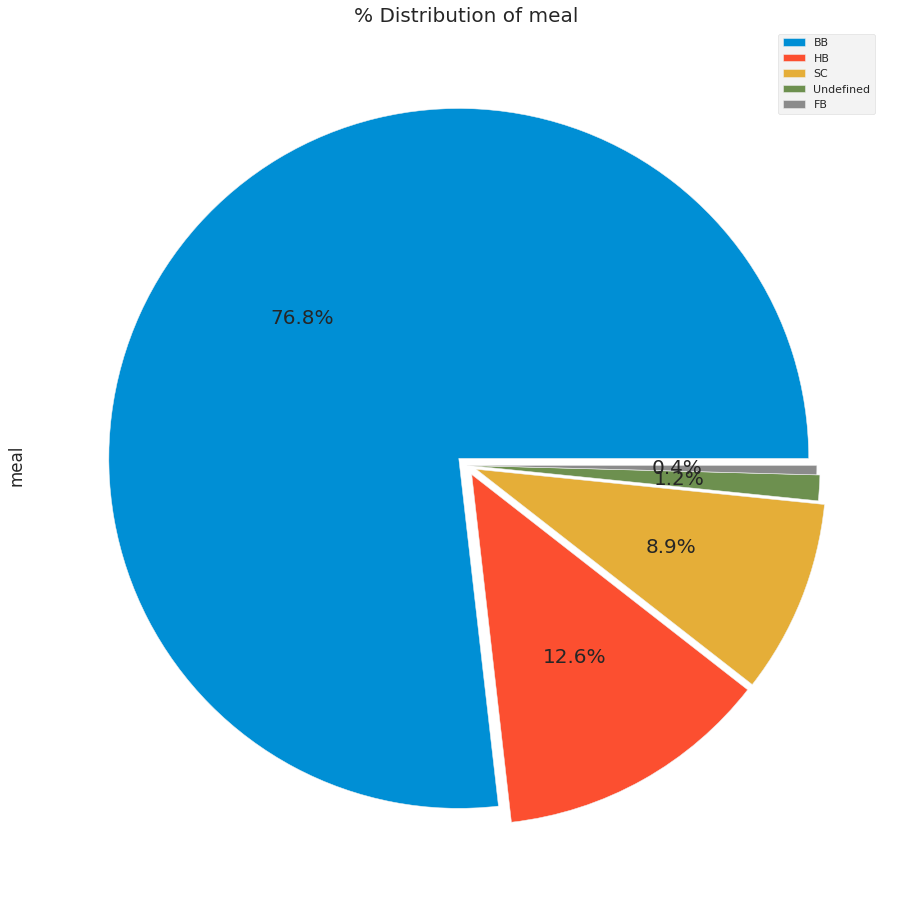

In [82]:
df['meal'].value_counts().plot.pie(explode=(0.03,0.03,0.03,0.01,0.001),autopct='%1.01f%%',shadow=False,figsize=(24,15),fontsize=20,labels=None)
plt.title("% Distribution of meal",fontsize=20)
labels=df['meal'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1),loc='upper left', labels=labels)


above countplot show the diffrent type of meal in hotel and percentage of meal
##Type of meal
###BB(bead and breakfast)=77%
###FB(full board) breakfast+lunch+dinner+other meal=0.66%
###HB(half board) brekfast+diner  =12%
###SC(self catering)  = 8%
###undefied  = 1%

#Observation
##So the most preferred meal type by the gusets is :
# BB(bead and breakfast)


#Problem
##what is the customer that special reservation status ?


##below countplot  show that  customer reservation status in hotel

Text(0, 0.5, ' Count')

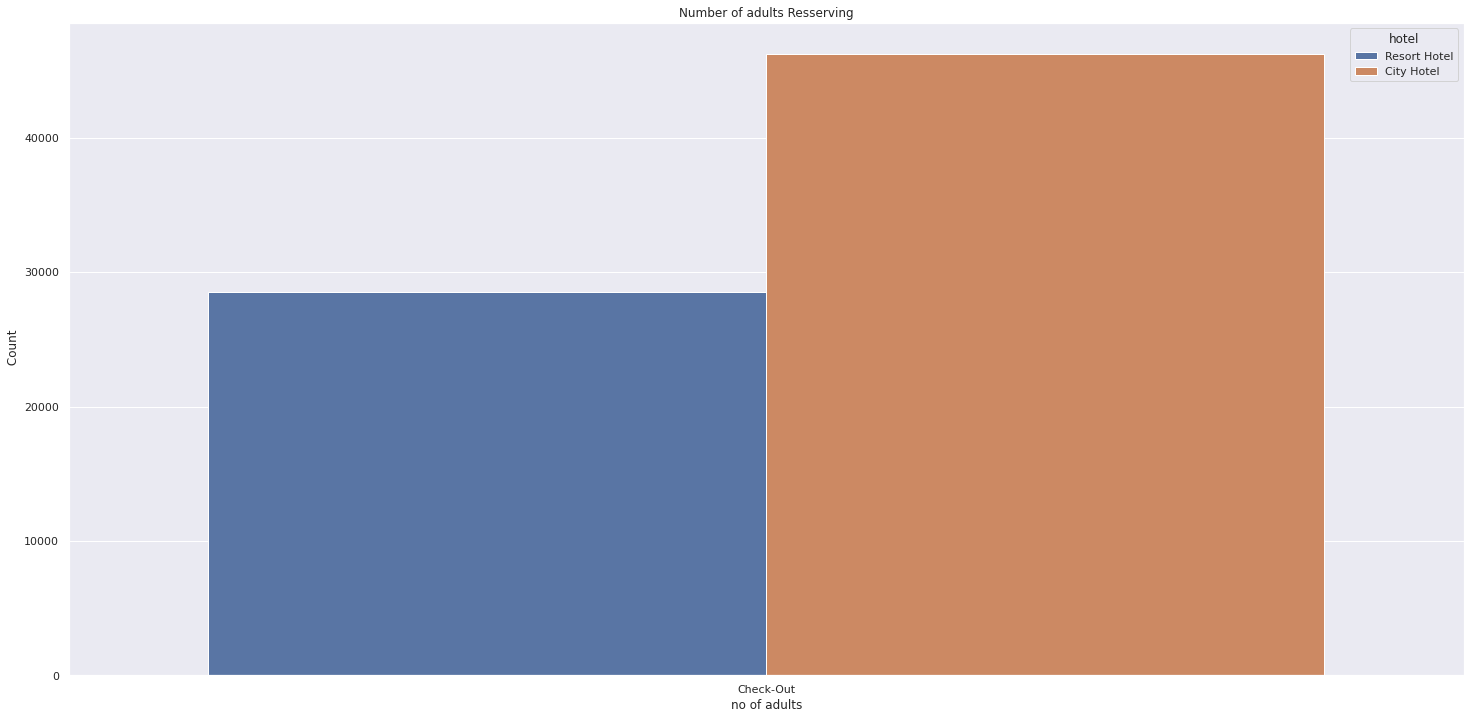

In [117]:
sns.set(rc={'figure.figsize':(25,12)})
adult=sns.countplot(x='reservation_status',hue='hotel',data=df)
adult.set(title='Number of adults Resserving')
adult.set_xlabel("no of adults",fontsize=12)
adult.set_ylabel(" Count",fontsize=12)

In [90]:
df['reservation_status'].value_counts(normalize=True)

Check-Out    1.0
Name: reservation_status, dtype: float64

#Observaion
##63% customer has checked in but already departed
##36% booking was canceled by  the customer
#1% customer did not checkin and did inform the hotel was reson why

#Problem
##which adults higest reserving hotel room ?


##checking  the adult travel acount

Text(0, 0.5, ' Count')

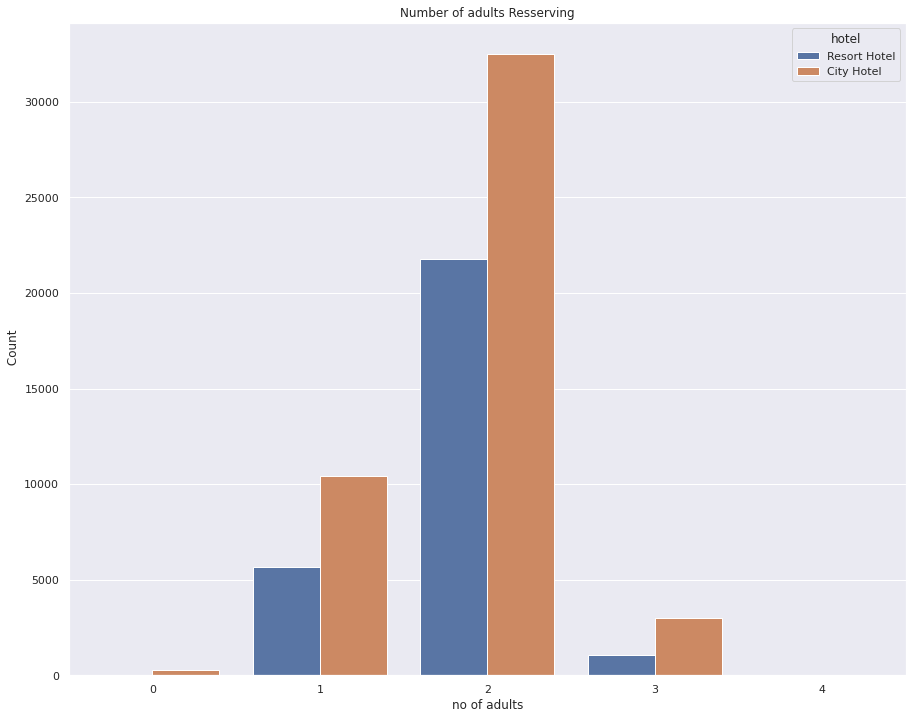

In [55]:
sns.set(rc={'figure.figsize':(15,12)})
adult=sns.countplot(x='adults',hue='hotel',data=df)
adult.set(title='Number of adults Resserving')
adult.set_xlabel("no of adults",fontsize=12)
adult.set_ylabel(" Count",fontsize=12)

In [56]:
df['adults'].value_counts(normalize=True)

2    0.726229
1    0.215078
3    0.054144
0    0.003933
4    0.000615
Name: adults, dtype: float64

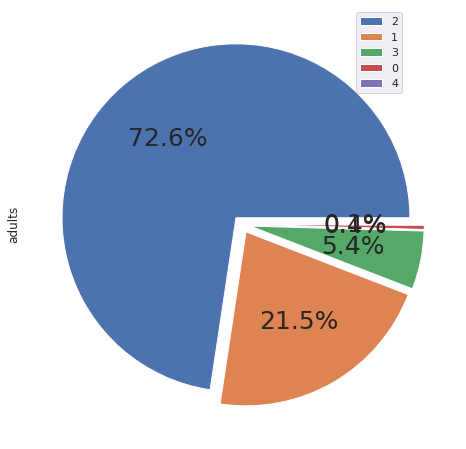

In [141]:
df['adults'].value_counts().plot.pie(explode=(0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
labels=df['adults'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.75, 1), loc='upper left', labels=labels)

#observation
##19% around booked as single room
##75% around booked as adults
##5% around booked as family room



##create a new column


In [75]:
df['total_family'] = df['adults'] + df['children'] + df['babies']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_number,nights_stayed,got_desired_room,price,total_family
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,7,1,No,75.0,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,7,1,Yes,75.0,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,7,2,Yes,196.0,2.0


#

#Problem 
## How many family book room as couple, with single child or more than one child ?

Text(0, 0.5, 'Reservation Count')

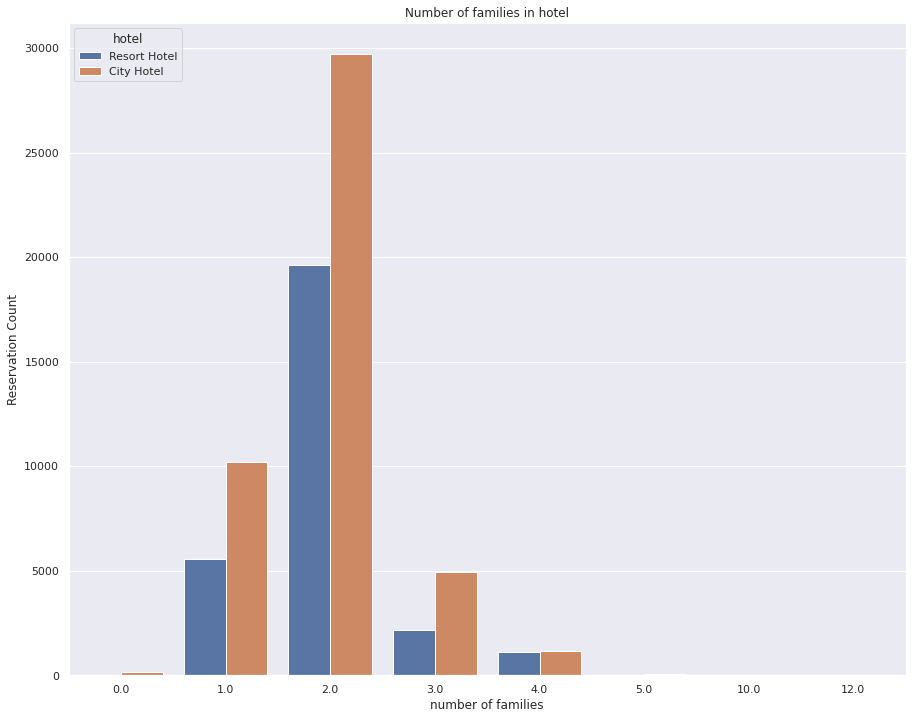

In [77]:
sns.set(rc={'figure.figsize':(15,12)})
family=sns.countplot(x='total_family',hue='hotel',data=df)
family.set(title='Number of families in hotel')
family.set_xlabel("number of families",fontsize=12)
family.set_ylabel("Reservation Count",fontsize=12)

In [78]:
df['total_family'].value_counts(normalize=True)

2.0     0.660285
1.0     0.210703
3.0     0.095030
4.0     0.030504
0.0     0.002074
5.0     0.001378
12.0    0.000013
10.0    0.000013
Name: total_family, dtype: float64

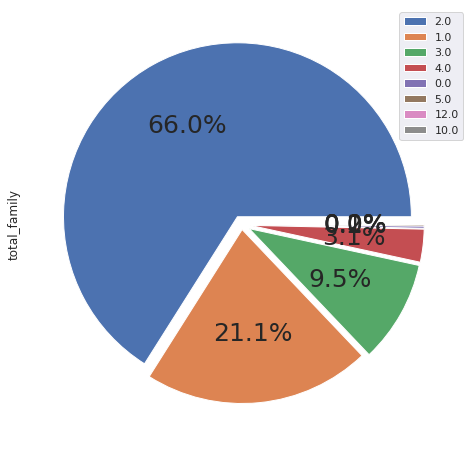

In [79]:
df['total_family'].value_counts().plot.pie(explode=(0.05,0.03,0.05,0.05,0.05,0.05,0.05,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=25,labels=None)
labels=df['total_family'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

observation
##68% couple family booking hotel room and 19% familis with 1 child and 9%family  with 2 children booking room and 2% more than 2 children family booking room

#Problem
##Hightest number of days customer stay in hotel ?

In [61]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_number,nights_stayed,got_desired_room,price,total_family,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,7,1,No,75.0,1.0,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Check-Out,2015-07-02,7,1,Yes,75.0,1.0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,1,Check-Out,2015-07-03,7,2,Yes,196.0,2.0,2


Text(0, 0.5, 'Count')

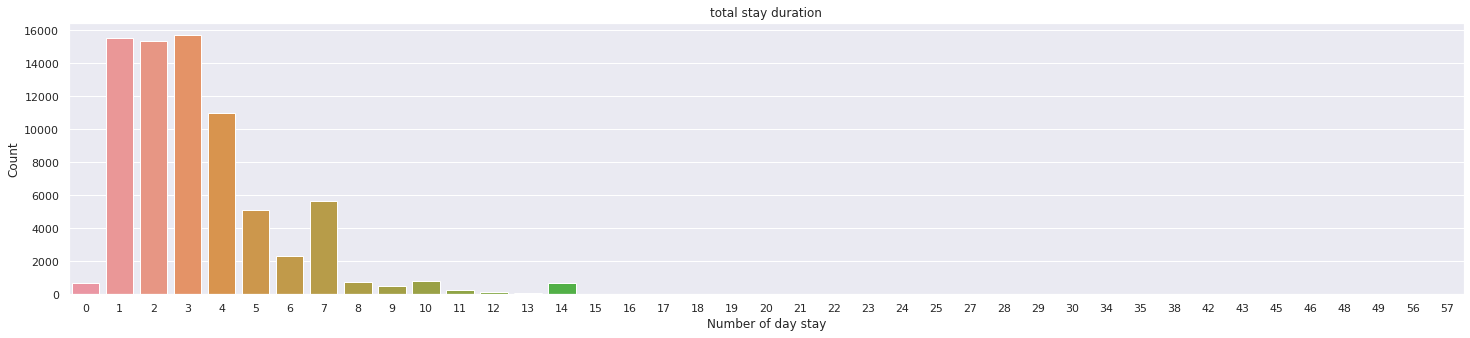

In [63]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['total_stay'])
plt.title('total stay duration')
plt.xlabel('Number of day stay')
plt.ylabel('Count')

In [64]:
df['total_stay'].value_counts(normalize=True)

3     0.209914
1     0.207880
2     0.205686
4     0.147247
7     0.075965
5     0.068366
6     0.030972
10    0.010422
8     0.009579
0     0.009031
14    0.008777
9     0.007024
11    0.003693
12    0.001672
13    0.001191
15    0.000508
21    0.000482
28    0.000308
16    0.000241
17    0.000201
25    0.000187
22    0.000134
18    0.000080
19    0.000080
35    0.000067
29    0.000040
42    0.000040
30    0.000027
23    0.000027
49    0.000013
43    0.000013
34    0.000013
57    0.000013
24    0.000013
56    0.000013
48    0.000013
20    0.000013
38    0.000013
45    0.000013
46    0.000013
27    0.000013
Name: total_stay, dtype: float64

#Observation
#these graph show that the higehst customer book room for  2 days
##24% customer book room for 2 days 
##22% cusomer book room for 3  days
##17% customer book room for 1 days
##14% customer book room for 4 days
##8% customer book room for 7 days

#Problem 
##what is the optimal stay of lenght to get the best daily rate ?

In [65]:
def total_price(total_stay,adr):
   total_price = 0
   if total_stay > 0:
     total_price = total_stay*adr
   return total_price  




In [66]:
df['total_price'] = df.apply(lambda x: total_price(x['total_stay'], x['adr']),axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,month_number,nights_stayed,got_desired_room,price,total_family,total_stay,total_price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,1,No,75.0,1.0,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,1,Yes,75.0,1.0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,7,2,Yes,196.0,2.0,2,196.0


Text(0.5, 1.0, 'average hotel charges in day wise')

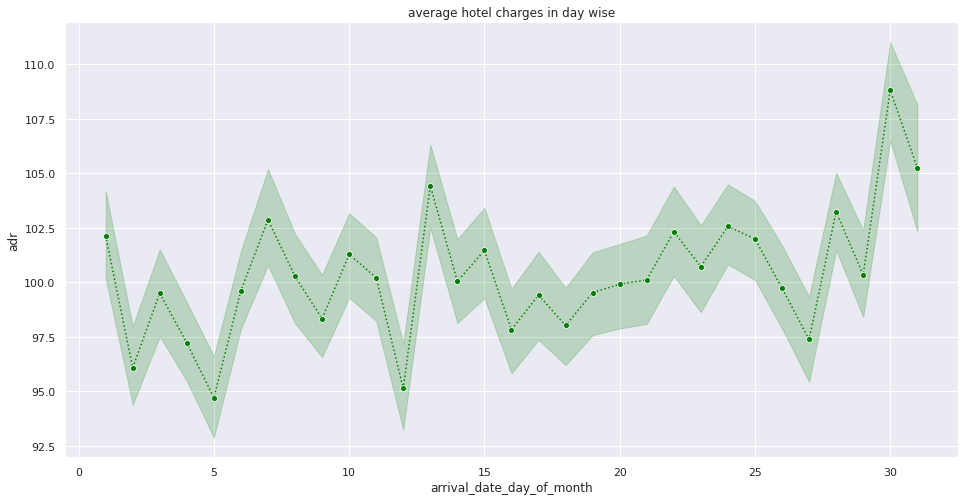

In [68]:
plt.figure(figsize=(16,8))
sns.lineplot(x='arrival_date_day_of_month',y='adr',data=df , color='green',
         marker='o',
         linestyle='dotted',)
plt.title('average hotel charges in day wise')

#Observation
##Above lineplot says that average daily rate  in arrival day of the month .
## cutsomer will get best rate if he stays 5 days in hotel 

#Problem
##what is the percentage distribution of required_car_parking_spaces ?

Text(0, 0.5, 'Count')

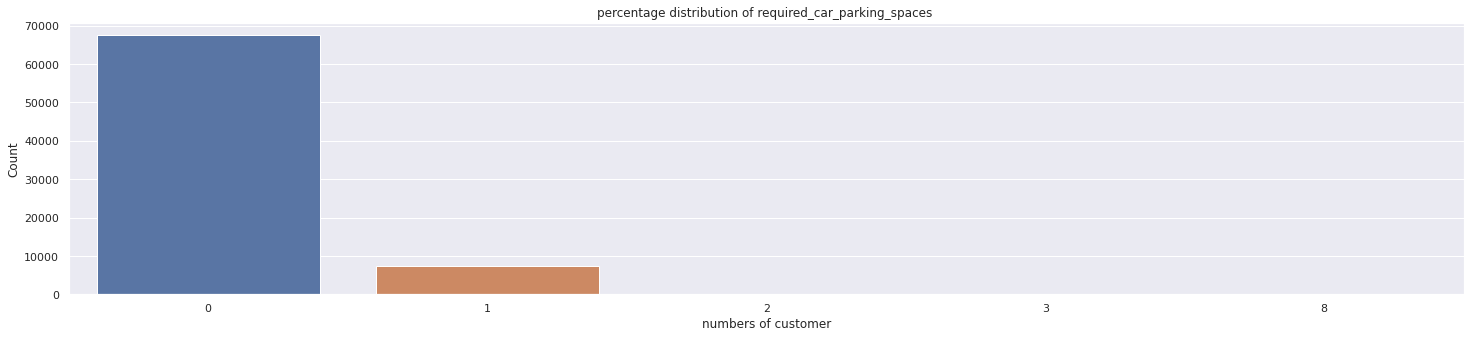

In [69]:
# required_car_parking_spaces distribution
plt.figure(figsize=(25,5))
sns.countplot(x=df['required_car_parking_spaces'])
plt.title('percentage distribution of required_car_parking_spaces ')
plt.xlabel('numbers of customer')
plt.ylabel('Count')

In [70]:
df['required_car_parking_spaces'].value_counts(normalize=True)


0    0.902201
1    0.097358
2    0.000375
3    0.000040
8    0.000027
Name: required_car_parking_spaces, dtype: float64

#observation
##93% cutomer did not required the parking space only 7% customer requried 1 parking spaces

#Problem
##Which Distribution channel is mostly used for hotel bookings?

Text(0, 0.5, 'Count')

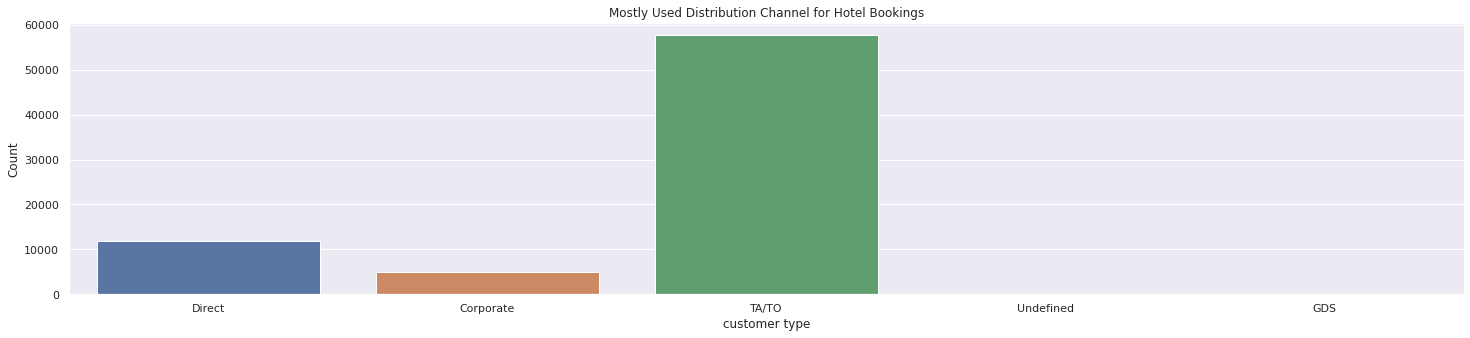

In [76]:
plt.figure(figsize=(25,5))
sns.countplot(x=df['distribution_channel'])
plt.title('Mostly Used Distribution Channel for Hotel Bookings')
plt.xlabel('customer type')
plt.ylabel('Count')

In [77]:
df['distribution_channel'].value_counts(normalize=True)

TA/TO        0.770767
Direct       0.159743
Corporate    0.067389
GDS          0.002087
Undefined    0.000013
Name: distribution_channel, dtype: float64

#Observation


## TA & TO distribution_chanel  is mostly used for hotel booking
##82% TA&TO(Travel Agents,Tour opretors) 
##12% Direct booking
##5% corporate booking

#Problem
##Relationship between adr(average daily rate) and total_stay ?
 

In [78]:
df.drop(df[df['adr'] > 5000].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0.5, 1.0, 'Relationship between  adr and total stay')

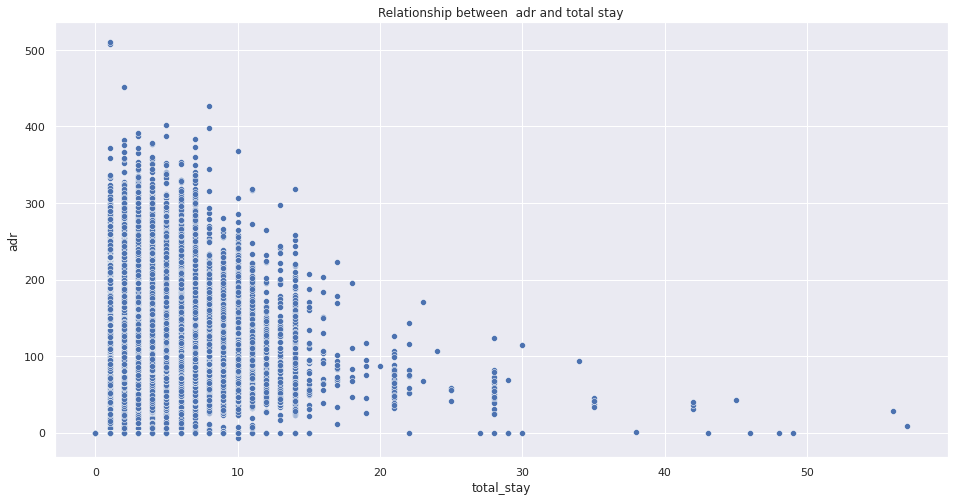

In [79]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df['total_stay'],y=df['adr'])
plt.title('Relationship between  adr and total stay')

#Observation
##Above scatter plot show that if the number of days  for stays increase for customer then Adr(Average daily rate) decrease .
#Thus for longer stays customer get good adr 

#Problem
##Which agent did the most bookings ?

In [73]:
## return highest bookings made by agents
highest_bookings= df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "no_of_Bookings" }).sort_values(by='no_of_Bookings',ascending=False)

highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 
top_bookings=highest_bookings[:10]


Text(0.5, 1.0, 'Most Bookings Made by the agent')

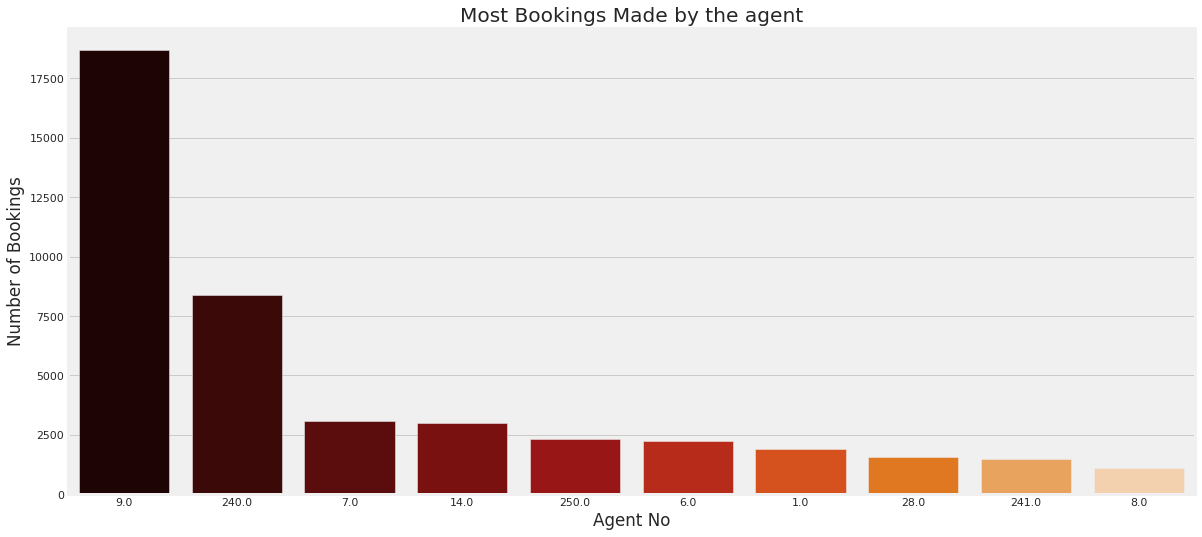

In [83]:
plt.figure(figsize=(18,8))
sns.barplot(x=top_bookings['agent'],y=top_bookings['no_of_Bookings'],order=top_bookings['agent'],palette='gist_heat')
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


In [82]:
top_bookings

,agent,Most_Bookings
8,9.0,18696
164,240.0,8387
6,7.0,3065
13,14.0,2987
173,250.0,2342
5,6.0,2263
0,1.0,1911
26,28.0,1556
165,241.0,1482
7,8.0,1087


#Problem
##In which month hotel charges higher Adr ?

Text(0.5, 1.0, 'average hotel charges in month wise')

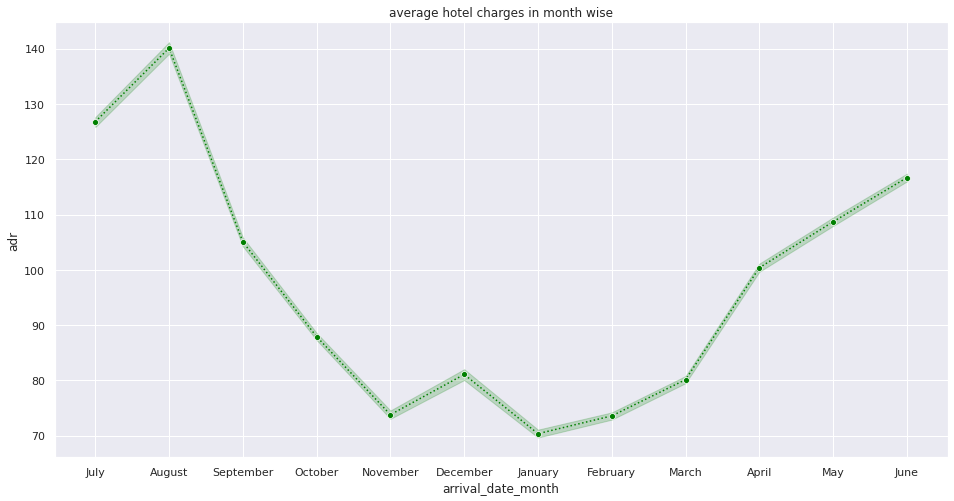

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='arrival_date_month',y='adr',data=df , color='green',
         marker='o',
         linestyle='dotted',)
plt.title('average hotel charges in month wise')

#Obsevation 
#Above line plot says that the highest hotel booking rate  is on august month 

In [83]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,month_number,nights_stayed,got_desired_room,price,total_family,total_stay,total_price
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,7,0,Yes,0.0,2.0,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,1,No,75.0,1.0,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Check-Out,2015-07-02,7,1,Yes,75.0,1.0,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1,Check-Out,2015-07-03,7,2,Yes,196.0,2.0,2,196.0


In [86]:
df['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(10,8),fontsize=20,labels=none)
plt.title("% Distribution of deposit type")
labels=df['deposit_type'].value_counts().index.tolist()
plt.xlabel('')
plt.ylabel('')
plt.show()

NameError: ignored